<a href="https://colab.research.google.com/github/Swathi014/22ITCS100-Advanced-Machine-Learning/blob/main/LR_Regularized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regularized Logistic regression

-implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA).
-During QA, each microchip goes through various tests to ensure it is functioning correctly.
-Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests.
-From these two tests, you would like to determine whether the microchips should be accepted or rejected.
-To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

### Loading the data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("/content/drive/MyDrive/MTECH/Dataset/ex2data2.txt", header=None)
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [5]:
df.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646563,1.000000
max,1.070900,1.108900,1.000000


In [6]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

### Plotting of the data

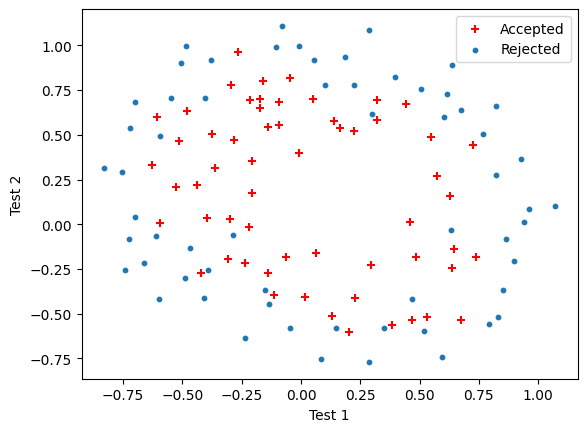

In [7]:
pos , neg = (y==1).reshape(118,1) , (y==0).reshape(118,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Test 1")
plt.ylabel("Test 2")
plt.legend(["Accepted","Rejected"],loc=0)

### Feature Mapping

with k variables and degrees of n, the number of polynomial terms:

$ {k+ n \choose n}$

In [8]:
def mapFeature(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j).reshape(len(x1),1)
            out= np.hstack((out,terms))
    return out

In [9]:
X = mapFeature(X[:,0], X[:,1],6)

### Computing Regularize Cost Function and Gradient

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \Theta_j^2$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ for $j=0$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\Theta_j$ for $j\geq 1$

In [10]:
def sigmoid(z):
    """
    return the sigmoid of z
    """

    return 1/ (1 + np.exp(-z))

In [11]:
def costFunctionReg(theta, X, y ,Lambda):
    """
    Take in numpy array of theta, X, and y to return the regularize cost function and gradient
    of a logistic regression
    """

    m=len(y)
    y=y[:,np.newaxis]
    predictions = sigmoid(X @ theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost= cost + Lambda/(2*m) * sum(theta**2)

    # compute gradient
    j_0= 1/m * (X.transpose() @ (predictions - y))[0]
    j_1 = 1/m * (X.transpose() @ (predictions - y))[1:] + (Lambda/m)* theta[1:]
    grad= np.vstack((j_0[:,np.newaxis],j_1))
    return cost[0], grad

In [12]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))

# Set regularization parameter lambda to 1
Lambda = 1

#Compute and display initial cost and gradient for regularized logistic regression
cost, grad=costFunctionReg(initial_theta, X, y, Lambda)

In [13]:
print("Cost at initial theta (zeros):",cost)

Cost at initial theta (zeros): 0.6931471805599461


### Gradient Descent

In [14]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha

    return theta and the list of the cost of theta during each iteration
    """

    m=len(y)
    J_history =[]

    for i in range(num_iters):
        cost, grad = costFunctionReg(theta,X,y,Lambda)
        theta = theta - (alpha * grad)
        J_history.append(cost)

    return theta , J_history

In [15]:
theta , J_history = gradientDescent(X,y,initial_theta,1,800,0.2)

In [16]:
print("The regularized theta using ridge regression:\n",theta)

The regularized theta using ridge regression:
 [[ 2.25319932]
 [ 1.44552306]
 [ 2.33283911]
 [-3.57008233]
 [-2.35002884]
 [-3.07090829]
 [ 0.50119267]
 [-0.88407626]
 [-0.69606495]
 [-0.22204243]
 [-2.69560917]
 [ 0.04161168]
 [-1.31573798]
 [-0.80286232]
 [-2.23101395]
 [-0.39638083]
 [-0.43758167]
 [ 0.09476652]
 [-0.69300577]
 [-0.78996079]
 [-0.45416815]
 [-2.01051679]
 [ 0.16446857]
 [-0.59855483]
 [ 0.11471778]
 [-0.73960173]
 [-0.52044034]
 [-1.38532427]]


### Plotting of Cost function

<>:3: SyntaxWarning: invalid escape sequence '\T'
<>:3: SyntaxWarning: invalid escape sequence '\T'
/tmp/ipython-input-992478879.py:3: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("$J(\Theta)$")


Text(0.5, 1.0, 'Cost function using Gradient Descent')

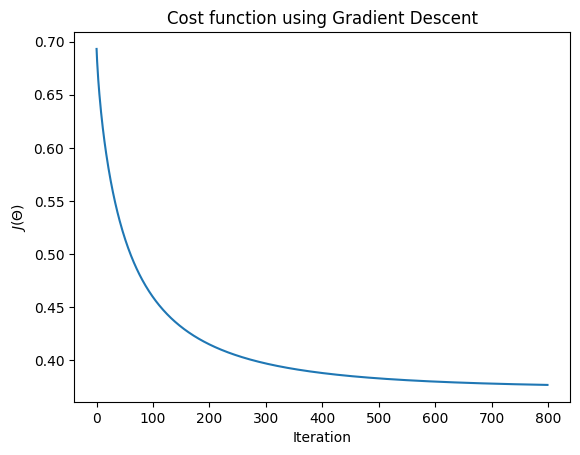

In [17]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Plot Decision Boundary

In [18]:
def mapFeaturePlot(x1,x2,degree):
    """
    take in numpy array of x1 and x2, return all polynomial terms up to the given degree
    """
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

/tmp/ipython-input-2112971633.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta


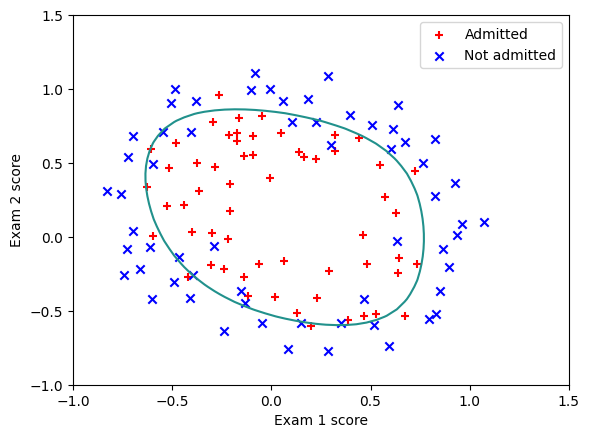

In [19]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")

# Plotting decision boundary

u_vals = np.linspace(-1,1.5,50)
v_vals= np.linspace(-1,1.5,50)
z=np.zeros((len(u_vals),len(v_vals)))
for i in range(len(u_vals)):
    for j in range(len(v_vals)):
        z[i,j] =mapFeaturePlot(u_vals[i],v_vals[j],6) @ theta

plt.contour(u_vals,v_vals,z.T,0)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### Accuracy of model

In [20]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class
    """
    predictions = X.dot(theta)

    return predictions>0

In [21]:
p=classifierPredict(theta,X)
print("Train Accuracy:", (sum(p==y[:,np.newaxis])/len(y) *100)[0],"%")

Train Accuracy: 83.05084745762711 %


### Lasso Regression

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n |\Theta_j|$

In [23]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty="l2")
clf.fit(X,y)

LogisticRegression()

In [24]:
thetaLasso=clf.coef_

In [25]:
print("The regularized theta using lasso regression:\n",thetaLasso.reshape(28,1))

The regularized theta using lasso regression:
 [[ 0.00355384]
 [ 0.62649744]
 [ 1.18347463]
 [-2.01822414]
 [-0.92509818]
 [-1.43297452]
 [ 0.12080809]
 [-0.36138088]
 [-0.35124219]
 [-0.18070649]
 [-1.457976  ]
 [-0.04626262]
 [-0.61437429]
 [-0.27475533]
 [-1.19368413]
 [-0.24525782]
 [-0.20212595]
 [-0.04094758]
 [-0.27840674]
 [-0.29237724]
 [-0.45632369]
 [-1.04244842]
 [ 0.03185094]
 [-0.29170578]
 [ 0.01842395]
 [-0.32739269]
 [-0.14257192]
 [-0.92087392]]
